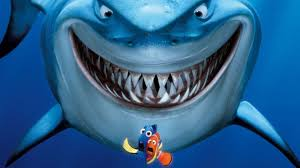

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import re

In [155]:
data = pd.read_csv(r'C:\Users\juanp\Ironhack\pandas-project\data\data_clean.csv')

In [156]:
data

,original order,Case Number,Year,Type,Country,Area,Activity,Sex,Injury,Fatal (Y/N),Time
0,6303.0,2018.06.25,2018.0,Boat,USA,California,Surfing,F,"No injury to occupant, outrigger canoe and pad...",N,18:00
1,6302.0,2018.06.18,2018.0,Unprovoked,USA,Georgia,Standing,F,Minor injury to left thigh,N,14:00
2,6301.0,2018.06.09,2018.0,Invalid,USA,Hawaii,Surfing,M,Injury to left lower leg from surfboard skeg,N,07:45
3,6300.0,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,Minor injury to lower leg,N,07:45
4,6299.0,2018.06.04,2018.0,Provoked,MEXICO,Colima,Diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,07:45
...,...,...,...,...,...,...,...,...,...,...,...
6297,6.0,ND.0005,0.0,Unprovoked,AUSTRALIA,Western Australia,Diving,M,FATAL,Y,16:00
6298,5.0,ND.0004,0.0,Unprovoked,AUSTRALIA,Western Australia,Diving,M,FATAL,Y,16:00
6299,4.0,ND.0003,0.0,Unprovoked,USA,North Carolina,Swimming,M,FATAL,Y,16:00
6300,3.0,ND.0002,0.0,Unprovoked,PANAMA,Unknown,Unknown,M,FATAL,Y,16:00


In [157]:
#We set 'original order' as the index

data = data.set_index("original order")

In [158]:
data

,Case Number,Year,Type,Country,Area,Activity,Sex,Injury,Fatal (Y/N),Time
original order,,,,,,,,,,
6303.0,2018.06.25,2018.0,Boat,USA,California,Surfing,F,"No injury to occupant, outrigger canoe and pad...",N,18:00
6302.0,2018.06.18,2018.0,Unprovoked,USA,Georgia,Standing,F,Minor injury to left thigh,N,14:00
6301.0,2018.06.09,2018.0,Invalid,USA,Hawaii,Surfing,M,Injury to left lower leg from surfboard skeg,N,07:45
6300.0,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,Minor injury to lower leg,N,07:45
6299.0,2018.06.04,2018.0,Provoked,MEXICO,Colima,Diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,07:45
...,...,...,...,...,...,...,...,...,...,...
6.0,ND.0005,0.0,Unprovoked,AUSTRALIA,Western Australia,Diving,M,FATAL,Y,16:00
5.0,ND.0004,0.0,Unprovoked,AUSTRALIA,Western Australia,Diving,M,FATAL,Y,16:00
4.0,ND.0003,0.0,Unprovoked,USA,North Carolina,Swimming,M,FATAL,Y,16:00


#### The firs thing we have to check in this analysis is the countrys in which there are more shark attacks

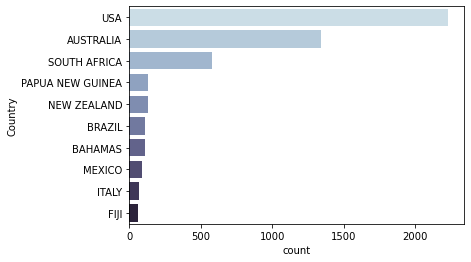

In [180]:
sns.countplot(y="Country", data=data, palette="ch:s=.25,rot=-.25",
              order=data.Country.value_counts().iloc[:10].index)

#### As can be seen, and should not be a surprise, is that most attacks have taken place in locations of the USA, Australia and South Africa

#### In what refers to the focus group of sharks, it can be seen that surfers lead the way followed by swimmers and fishers. Regarding this conclusion, ther is a theory that states that sharks see surfers in their boards as seals, what makes them want to take a bite, or at least check if it is something worthy to be eaten.  

#### Should also be noticed that, the countries in which more attack have taken place have a huge surfing culture, which kind of reinforces both findings

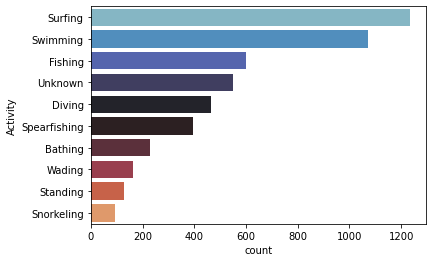

In [184]:
sns.countplot(y="Activity", data=data, palette="icefire",
              order=data.Activity.value_counts().iloc[:10].index)

#### In the following graph we can see that most victims are males. Maybe is not surprising as men are ususally more careless than women, but there is way too much difference between bot sexs, so we should make any conclusions

#### What can be seen is that most attacks are not fatal, against what most people think. This confirms the main hipothesis of this work, which was that shark attacks are not as fatal as people believe, and that there a is a common missunderstanding reagrding sharks' agrresiveness. 

#### The hard truth is, that this believe has led to a series of activites that are threatening to extinguish many shark species, and if we don't act quickly, it may be too late

In [192]:
def graph(a,b,c,d):
    return sns.countplot(x=b, data=a, palette=c,
              order=a[b].value_counts().iloc[:d].index)
    

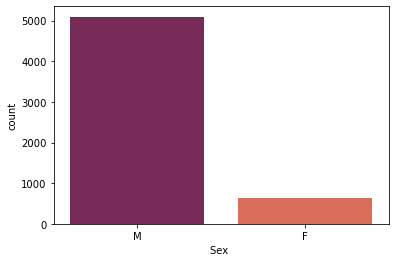

In [193]:
graph(data, "Sex ", "rocket", 2)

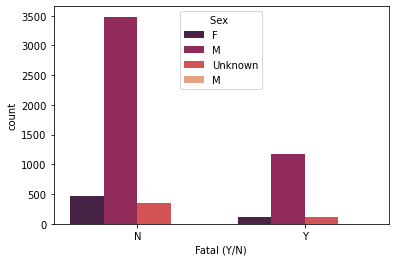

In [190]:
sns.countplot(x="Fatal (Y/N)", hue="Sex ", data=data, palette="rocket",
              order=data["Fatal (Y/N)"].value_counts().iloc[:2].index)

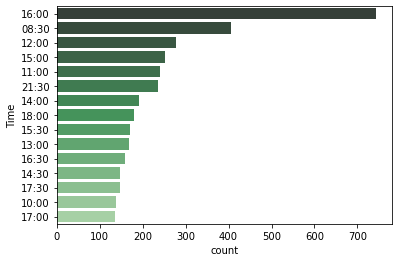

In [175]:
sns.countplot(y="Time", data=data, palette="Greens_d",
              order=data.Time.value_counts().iloc[:15].index)